# Importing Libraries

In [208]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
import collections
from collections import Counter

In [209]:
!pip install clean-text
!pip install emoji

# Importing Dataset

In [210]:
df_sarcastic = pd.read_csv('/content/drive/MyDrive/SEM 7/NLP/Sarcasm_Hindi_Tweets-SARCASTIC.csv')
df_non_sarcastic = pd.read_csv('/content/drive/MyDrive/SEM 7/NLP/Sarcasm_Hindi_Tweets-NON-SARCASTIC.csv')
df_sarcastic['label'] = 'sarcastic'
df_non_sarcastic['label'] = 'non_sarcastic'
df = pd.concat([df_sarcastic, df_non_sarcastic], axis=0)
df = df.drop(['username','acctdesc','location','following','followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts', 'retweetcount', 'hashtags'] ,axis=1)
df = df.reset_index()
df = df.drop('index',axis=1)

def count_length():
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))

count_length()
df

,text,label,word_count
0,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
1,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
2,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
3,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
4,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
...,...,...,...
16174,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोरे मूवी में काम करके यह सिखाया कि संघर्ष से दूर ना भागे । आत्महत्या ना करें और अब खुद ही आत्महत्या कर ली।\n#ripsushant #ripsushantsinghrajput #ripSSR #fuck2020 #sad https://t.co/WwhrA2iqQF,non_sarcastic,36
16175,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16176,"#SushantSinghRajput #Suicide क्यों?? चमक धमक सिर्फ दिखावा है इस फिल्म इंडस्ट्री का, बाकी सब अंदर से टूटे हुए हैं चाहे फिर वो कितना भी महान अदाकार क्यों न सबकी जिंदगी सिर्फ दिखावा है सिर्फ घोर दिखावा 👎 #Sad",non_sarcastic,40
16177,हर हाल में #खुश रहना सीख लो🙃\n उस दिल को क्या #उदास रखना🧐\n जिसमें मेरा #भोले बसता हो❤🙏\n\n#जय_भोलेनाथ की 🙏☘🌺 📿🐚🛐\n\n@Being_Suchita @meShital_ \n@Oye_IShuu_ @sushma_pandey1\n@MansiSi62158538 @SSNaina_ https://t.co/5ouhhtgZjt,non_sarcastic,47


# Removing Emoji from Text

In [211]:
import emoji

df = pd.DataFrame(df)
df['text'] = df['text'].apply(lambda s: emoji.replace_emoji(s, ' '))
df

,text,label,word_count
0,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
1,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
2,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
3,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
4,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष",sarcastic,58
...,...,...,...
16174,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोरे मूवी में काम करके यह सिखाया कि संघर्ष से दूर ना भागे । आत्महत्या ना करें और अब खुद ही आत्महत्या कर ली।\n#ripsushant #ripsushantsinghrajput #ripSSR #fuck2020 #sad https://t.co/WwhrA2iqQF,non_sarcastic,36
16175,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16176,"#SushantSinghRajput #Suicide क्यों?? चमक धमक सिर्फ दिखावा है इस फिल्म इंडस्ट्री का, बाकी सब अंदर से टूटे हुए हैं चाहे फिर वो कितना भी महान अदाकार क्यों न सबकी जिंदगी सिर्फ दिखावा है सिर्फ घोर दिखावा #Sad",non_sarcastic,40
16177,हर हाल में #खुश रहना सीख लो \n उस दिल को क्या #उदास रखना \n जिसमें मेरा #भोले बसता हो \n\n#जय_भोलेनाथ की \n\n@Being_Suchita @meShital_ \n@Oye_IShuu_ @sushma_pandey1\n@MansiSi62158538 @SSNaina_ https://t.co/5ouhhtgZjt,non_sarcastic,47


In [212]:
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import defaultdict
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Sample Tokenization of 1 sentence

In [213]:
from nltk.tokenize import word_tokenize

corpus ="हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ले के बच्चों को अपने स्कूल आने को कहते थे। जब मैं बड़ा हुआ तो पता चला- स्कूल मास्टर के बेटे का, बस उनके भतीजे की, कैंटीन उनके भांजे की और पढ़ाने वाले भी सब उनके रिश्तेदार ही थे..! \n\nआज मास्टर जी में सरकार में मंत्री हैं.! \n\n#कटाक्ष"
tokens = word_tokenize(corpus)

print(tokens)


['हमारे', 'गांव', 'में', 'एक', 'मास्टर', 'जी', 'रहते', 'थे', ',', 'वो', 'मोहल्ले', 'के', 'बच्चों', 'को', 'अपने', 'स्कूल', 'आने', 'को', 'कहते', 'थे।', 'जब', 'मैं', 'बड़ा', 'हुआ', 'तो', 'पता', 'चला-', 'स्कूल', 'मास्टर', 'के', 'बेटे', 'का', ',', 'बस', 'उनके', 'भतीजे', 'की', ',', 'कैंटीन', 'उनके', 'भांजे', 'की', 'और', 'पढ़ाने', 'वाले', 'भी', 'सब', 'उनके', 'रिश्तेदार', 'ही', 'थे', '..', '!', 'आज', 'मास्टर', 'जी', 'में', 'सरकार', 'में', 'मंत्री', 'हैं.', '!', '#', 'कटाक्ष']


# Tokenization of the whole dataset

In [214]:
import nltk
nltk.download('stopwords')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
import re

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

df['text'] = df['text'].apply(message_cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [215]:
count_length()
df

,text,label,word_count
0,"[हमारे, गांव, में, एक, मास्टर, जी, रहते, थे, वो, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, मास्टर, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, मास्टर, जी, में, सरकार, में, मंत्री, हैं, कटाक्ष]",sarcastic,57
1,"[हमारे, गांव, में, एक, मास्टर, जी, रहते, थे, वो, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, मास्टर, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, मास्टर, जी, में, सरकार, में, मंत्री, हैं, कटाक्ष]",sarcastic,57
2,"[हमारे, गांव, में, एक, मास्टर, जी, रहते, थे, वो, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, मास्टर, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, मास्टर, जी, में, सरकार, में, मंत्री, हैं, कटाक्ष]",sarcastic,57
3,"[हमारे, गांव, में, एक, मास्टर, जी, रहते, थे, वो, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, मास्टर, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, मास्टर, जी, में, सरकार, में, मंत्री, हैं, कटाक्ष]",sarcastic,57
4,"[हमारे, गांव, में, एक, मास्टर, जी, रहते, थे, वो, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, मास्टर, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, मास्टर, जी, में, सरकार, में, मंत्री, हैं, कटाक्ष]",sarcastic,57
...,...,...,...
16174,"[स्वर्गीय, श्री, सुशांत, सिंह, राजपूत, ने, हमें, छिछोरे, मूवी, में, काम, करके, यह, सिखाया, कि, संघर्ष, से, दूर, ना, भागे, ।, आत्महत्या, ना, करें, और, अब, खुद, ही, आत्महत्या, कर, ली।, ripsushant, ripsushantsinghrajput, ripSSR, fuck2020, sad, httpstcoWwhrA2iqQF]",non_sarcastic,37
16175,"[बॉलीवुड, एक्टर, सुशांतसिंहराजपूत, ने, फांसी, लगाकर, की, खुदखुशी, खुदखुशी, करने, वालो, पर, मुझे, तरस, नही, आता, क्योंकि, दुनिया, मे, खुशी, और, गम, दोनों, मिलते, है, जो, उसे, न, झेल, सके, वो, इंसान, बुझदिल, होता, है, सुशांत, तुमने, सही, नहीं, किया, खैर, अल्लाह, घर, वालों, को, सब्र, अता, करेआमीन, SushantSinghRajput, httpstcoa8pRKR5GZU]",non_sarcastic,50
16176,"[SushantSinghRajput, Suicide, क्यों, चमक, धमक, सिर्फ, दिखावा, है, इस, फिल्म, इंडस्ट्री, का, बाकी, सब, अंदर, से, टूटे, हुए, हैं, चाहे, फिर, वो, कितना, भी, महान, अदाकार, क्यों, न, सबकी, जिंदगी, सिर्फ, दिखावा, है, सिर्फ, घोर, दिखावा, Sad]",non_sarcastic,37
16177,"[हर, हाल, में, खुश, रहना, सीख, लो, उस, दिल, को, क्या, उदास, रखना, जिसमें, मेरा, भोले, बसता, हो, जयभोलेनाथ, की, BeingSuchita, meShital, OyeIShuu, sushmapandey1, MansiSi62158538, SSNaina, httpstco5ouhhtgZjt]",non_sarcastic,27


#Distribution of each Tweet-length per Label after cleaning data

In [216]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['text'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'है': 15080, 'की': 14441, 'में': 12075, 'को': 9397, 'के': 8348, 'और': 7976, 'कर': 7024, 'नेहरू': 6695, 'से': 6468, 'तो': 6450, 'ही': 5925, 'नहीं': 4911, 'लेते': 4790, 'जी': 4651, 'का': 4562, 'पर': 4486, 'कटाक्ष': 4479, 'अपने': 4044, 'आज': 3891, 'सब': 3750, 'भी': 3203, 'हैं': 2987, 'शी': 2710, 'एक': 2698, 'हो': 2696, 'तरह': 2675, 'उनके': 2585, 'जय': 2585, 'अगर': 2567, 'होते': 2540, 'मास्टर': 2460, 'वो': 2425, 'सिगरेट': 2395, 'बीवी': 2390, 'इश्क़': 2390, 'किताब': 2390, 'वश': 2385, 'जिनपिंग': 2380, 'पटाकर': 2380, 'पिलाकर': 2380, 'तिब्बत': 2380, 'सीधे': 2380, 'शंघाई': 2380, 'कब्जा': 2380, 'जंग': 2380, 'जायज़': 2380, 'द': 2380, 'ठरकी': 2380, 'कांग्रेस': 2320, 'एडविना': 2230, 'आक': 2230, 'थू': 2230, 'ये': 2177, 'थे': 1880, 'इश्क': 1800, 'हमारे': 1730, 'मैं': 1699, 'खुशी': 1675, 'स्कूल': 1665, 'hai': 1554, 'जो': 1426, 'लिए': 1263, 'दुख': 1260, 'Happy': 1255, 'हुआ': 1175, 'happy': 1163, 'चला': 1155, 'कि': 1132, 'जब': 1100, 'जिंदगी': 1075, 'sad': 1075, 'बस': 1055, 'कहते': 1050, 'वाले':

In [217]:
to_remove = ['नेहरू', 'लेते', 'कटाक्ष', 'जय', 'शी', 'अगर', 'मास्टर', 'वो', 'सिगरेट', 'बीवी', 'इश्क़', 'किताब', 'वश', 'पटाकर', 'पिलाकर']
for i in range(len(df)):
    df['text'][i]=[ele for ele in df['text'][i] if ele not in (to_remove)]
count_length()

<ipython-input-217-6ac0d2268941>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=[ele for ele in df['text'][i] if ele not in (to_remove)]


In [218]:
least_common= [word for word, word_count in Counter(corpus_list).most_common()[:-50:-1]]
for i in range(len(df)):
    df['text'][i]=[ele for ele in df['text'][i] if ele not in (least_common)]

<ipython-input-218-b753871445d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=[ele for ele in df['text'][i] if ele not in (least_common)]


In [219]:
df

,text,label,word_count
0,"[हमारे, गांव, में, एक, जी, रहते, थे, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, जी, में, सरकार, में, मंत्री, हैं]",sarcastic,52
1,"[हमारे, गांव, में, एक, जी, रहते, थे, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, जी, में, सरकार, में, मंत्री, हैं]",sarcastic,52
2,"[हमारे, गांव, में, एक, जी, रहते, थे, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, जी, में, सरकार, में, मंत्री, हैं]",sarcastic,52
3,"[हमारे, गांव, में, एक, जी, रहते, थे, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, जी, में, सरकार, में, मंत्री, हैं]",sarcastic,52
4,"[हमारे, गांव, में, एक, जी, रहते, थे, मोहल्ले, के, बच्चों, को, अपने, स्कूल, आने, को, कहते, थे।, जब, मैं, बड़ा, हुआ, तो, पता, चला, स्कूल, के, बेटे, का, बस, उनके, भतीजे, की, कैंटीन, उनके, भांजे, की, और, पढ़ाने, वाले, भी, सब, उनके, रिश्तेदार, ही, थे, आज, जी, में, सरकार, में, मंत्री, हैं]",sarcastic,52
...,...,...,...
16174,"[स्वर्गीय, श्री, सुशांत, सिंह, राजपूत, ने, हमें, छिछोरे, मूवी, में, काम, करके, यह, सिखाया, कि, संघर्ष, से, दूर, ना, भागे, ।, आत्महत्या, ना, करें, और, अब, खुद, ही, आत्महत्या, कर, ली।, ripsushant, ripsushantsinghrajput, ripSSR, fuck2020, sad, httpstcoWwhrA2iqQF]",non_sarcastic,37
16175,"[बॉलीवुड, एक्टर, सुशांतसिंहराजपूत, ने, फांसी, लगाकर, की, खुदखुशी, खुदखुशी, करने, वालो, पर, मुझे, तरस, नही, आता, क्योंकि, दुनिया, मे, खुशी, और, गम, दोनों, मिलते, है, जो, उसे, न, झेल, सके, इंसान, बुझदिल, होता, है, सुशांत, तुमने, सही, नहीं, किया, खैर, अल्लाह, घर, वालों, को, सब्र, अता, करेआमीन, SushantSinghRajput, httpstcoa8pRKR5GZU]",non_sarcastic,49
16176,"[SushantSinghRajput, Suicide, क्यों, चमक, धमक, सिर्फ, दिखावा, है, इस, फिल्म, इंडस्ट्री, का, बाकी, सब, अंदर, से, टूटे, हुए, हैं, चाहे, फिर, कितना, भी, महान, अदाकार, क्यों, न, सबकी, जिंदगी, सिर्फ, दिखावा, है, सिर्फ, घोर, दिखावा, Sad]",non_sarcastic,36
16177,"[हर, हाल, में, खुश, रहना, सीख, लो, उस, दिल, को, क्या, उदास, रखना, जिसमें, मेरा, भोले, बसता, हो, जयभोलेनाथ, की, BeingSuchita, meShital, OyeIShuu, sushmapandey1, MansiSi62158538, SSNaina, httpstco5ouhhtgZjt]",non_sarcastic,27


# Plotting Distribution of each Tweet-length per Label after cleaning data

array([<Axes: title={'center': 'non_sarcastic'}>,
       <Axes: title={'center': 'sarcastic'}>], dtype=object)

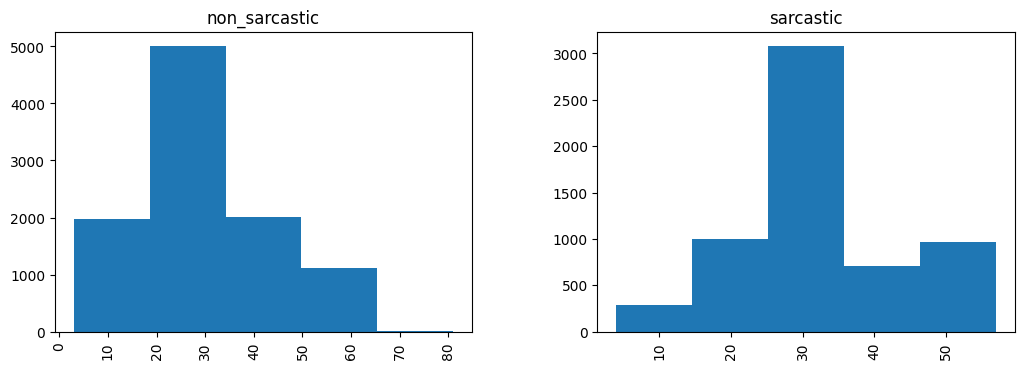

In [220]:
df.hist(column = 'word_count', by = 'label',figsize=(12,4), bins = 5)